<a href="https://colab.research.google.com/github/GustavoCirneFerreira/Big_Data_XPE/blob/main/Atividade_Regress%C3%A3o_Linear_XPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação de bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

In [ ]:
base_dados_clinicos = pd.read_csv("dados_clinicos.csv", sep=";")

In [ ]:
base_dados_clinicos.head()

,id_cliente,peso,colesterol,genero
0,1,102.0,111,Masculino
1,2,115.0,135,Masculino
2,3,115.0,136,Masculino
3,4,140.0,167,Feminino
4,5,130.0,158,Masculino


In [ ]:
base_dados_clinicos.shape

(590, 4)

In [ ]:
base_dados_clinicos.describe() # A média da lista está localizada na linha "mean", isto será útil em caso de falta de dados

,id_cliente,peso,colesterol
count,590.000000,585.000000,590.000000
mean,283.696610,143.158974,170.067797
std,156.464182,30.925402,39.325409
min,1.000000,95.000000,102.000000
25%,148.250000,116.000000,135.250000
50%,295.500000,140.000000,169.000000
75%,424.750000,171.000000,207.750000
max,547.000000,203.000000,235.000000


In [ ]:
base_dados_clinicos.isnull().sum() # Existem 5 valores que não foram inseridos (nulo) em peso

,0
id_cliente,0
peso,5
colesterol,0
genero,0


# Criação das variáveis e correções


In [ ]:
# Variável independente
x_peso = base_dados_clinicos.iloc[:,1].values # Agrupando todos os valores da coluna peso
x_peso # Observando a lista, tem como perceber que há valores nulos incluídos nela, o que irá causar problemas para o algorítimo

array([102., 115., 115., 140., 130., 198., 114., 145., 191., 186., 104.,
       188.,  96., 156., 125., 178., 109., 168., 152., 133., 153., 107.,
       199., 140.,  95., 183., 108., 190., 174., 149., 169., 138., 151.,
       109., 178., 106., 195.,  96., 129., 166., 197., 148., 117., 193.,
       170., 130., 183., 134., 128., 105., 115., 166., 183., 149., 110.,
       164., 157., 170., 124., 145., 113., 150., 100.,  nan, 139., 150.,
       101., 157., 187., 137., 121., 132., 130., 156., 180., 100., 122.,
       185., 113., 123., 119., 113., 168., 126., 102., 116., 144., 140.,
       124., 108., 154., 185., 106.,  97.,  96., 129., 124., 149.,  97.,
       102., 146.,  nan, 100., 118., 179., 179., 113., 142., 101., 174.,
       131., 179., 122., 105., 176., 103., 120., 118., 143., 134., 203.,
       116., 150., 192., 187., 107., 192.,  97., 157., 128., 183., 112.,
       173., 156., 137., 156., 112., 203., 141.,  97., 186., 113., 195.,
       175., 154., 173.,  nan, 152., 114., 181., 11

In [ ]:
# Variável dependente
y_colesterol = base_dados_clinicos.iloc[:,2].values # Agrupando todos os valores da coluna colesterol
y_colesterol

array([111, 135, 136, 167, 158, 227, 131, 176, 223, 221, 116, 222, 102,
       192, 152, 213, 125, 204, 189, 163, 189, 122, 228, 168, 102, 218,
       123, 222, 208, 183, 204, 167, 188, 126, 213, 122, 225, 105, 155,
       203, 225, 177, 139, 224, 207, 158, 218, 164, 154, 118, 138, 199,
       219, 183, 128, 197, 196, 208, 152, 175, 129, 185, 107, 211, 167,
       185, 110, 194, 221, 166, 143, 163, 158, 191, 216, 106, 146, 220,
       131, 147, 141, 130, 204, 152, 111, 139, 172, 168, 148, 123, 189,
       220, 120, 106, 105, 157, 149, 185, 106, 115, 177, 230, 108, 140,
       214, 216, 130, 169, 110, 209, 162, 214, 145, 116, 209, 116, 139,
       143, 168, 158, 232, 136, 180, 228, 222, 117, 224, 104, 195, 156,
       213, 133, 208, 195, 163, 195, 124, 231, 172, 104, 221, 128, 222,
       214, 184, 204, 171, 195, 132, 214, 123, 233, 107, 162, 204, 227,
       185, 142, 225, 212, 161, 220, 168, 155, 125, 144, 201, 222, 189,
       132, 204, 201, 211, 156, 179, 129, 185, 107, 213, 172, 19

In [ ]:
# Realizando o preenchimento dos dados nulos
x_peso[np.isnan(x_peso)] = 143.15  # Utilizando a média dos valores da lista como valor para preencher os espaços nulos
x_peso

array([102.  , 115.  , 115.  , 140.  , 130.  , 198.  , 114.  , 145.  ,
       191.  , 186.  , 104.  , 188.  ,  96.  , 156.  , 125.  , 178.  ,
       109.  , 168.  , 152.  , 133.  , 153.  , 107.  , 199.  , 140.  ,
        95.  , 183.  , 108.  , 190.  , 174.  , 149.  , 169.  , 138.  ,
       151.  , 109.  , 178.  , 106.  , 195.  ,  96.  , 129.  , 166.  ,
       197.  , 148.  , 117.  , 193.  , 170.  , 130.  , 183.  , 134.  ,
       128.  , 105.  , 115.  , 166.  , 183.  , 149.  , 110.  , 164.  ,
       157.  , 170.  , 124.  , 145.  , 113.  , 150.  , 100.  , 143.15,
       139.  , 150.  , 101.  , 157.  , 187.  , 137.  , 121.  , 132.  ,
       130.  , 156.  , 180.  , 100.  , 122.  , 185.  , 113.  , 123.  ,
       119.  , 113.  , 168.  , 126.  , 102.  , 116.  , 144.  , 140.  ,
       124.  , 108.  , 154.  , 185.  , 106.  ,  97.  ,  96.  , 129.  ,
       124.  , 149.  ,  97.  , 102.  , 146.  , 143.15, 100.  , 118.  ,
       179.  , 179.  , 113.  , 142.  , 101.  , 174.  , 131.  , 179.  ,
      

In [ ]:
# Verificando os valores nulos da lista novamente
num_nulos = np.isnan(x_peso).sum()
print('Quantidade de valores nulos:', num_nulos)

Quantidade de valores nulos: 0


In [ ]:
np.corrcoef(x_peso, y_colesterol) # Mostra uma matriz

array([[1.        , 0.98541713],
       [0.98541713, 1.        ]])

# Gráfico da correlação
Criação do gráfico para melhor observação da correlação

In [ ]:
# Criando uma variável para mostrar a correlação em gráfico
base_dados_clinicos.columns
correlacao_dados_clinicos = base_dados_clinicos[['peso', 'colesterol']] # Removendo as colunas gênero e id_cliente para não causar problemas na visualização

correlacao_dados_clinicos

,peso,colesterol
0,102.0,111
1,115.0,135
2,115.0,136
3,140.0,167
4,130.0,158
...,...,...
585,172.0,211
586,157.0,194
587,137.0,169
588,158.0,189


<Axes: >

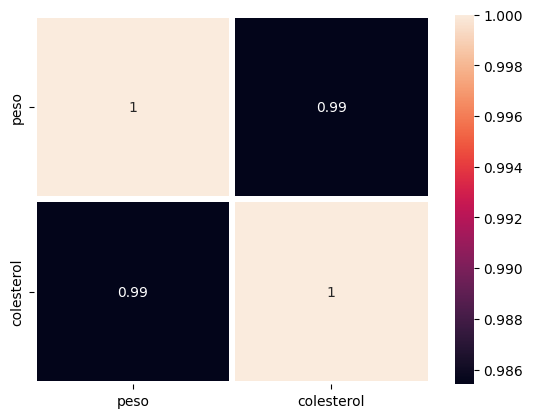

In [ ]:
correlation = correlacao_dados_clinicos.corr()

plot = sns.heatmap(correlation, annot=True, linewidths=3)
plot

# Tratamento dos dados para o modelo

In [ ]:
x_peso.shape # Para realizar o treinamento, precisamos de uma matriz com duas colunas

(590,)

In [ ]:
x_peso = x_peso.reshape(-1,1)
x_peso

array([[102.  ],
       [115.  ],
       [115.  ],
       [140.  ],
       [130.  ],
       [198.  ],
       [114.  ],
       [145.  ],
       [191.  ],
       [186.  ],
       [104.  ],
       [188.  ],
       [ 96.  ],
       [156.  ],
       [125.  ],
       [178.  ],
       [109.  ],
       [168.  ],
       [152.  ],
       [133.  ],
       [153.  ],
       [107.  ],
       [199.  ],
       [140.  ],
       [ 95.  ],
       [183.  ],
       [108.  ],
       [190.  ],
       [174.  ],
       [149.  ],
       [169.  ],
       [138.  ],
       [151.  ],
       [109.  ],
       [178.  ],
       [106.  ],
       [195.  ],
       [ 96.  ],
       [129.  ],
       [166.  ],
       [197.  ],
       [148.  ],
       [117.  ],
       [193.  ],
       [170.  ],
       [130.  ],
       [183.  ],
       [134.  ],
       [128.  ],
       [105.  ],
       [115.  ],
       [166.  ],
       [183.  ],
       [149.  ],
       [110.  ],
       [164.  ],
       [157.  ],
       [170.  ],
       [124.  

In [ ]:
x_peso.shape

(590, 1)

# Aplicando os dados ao algorítimo de regressão linear

In [ ]:
from sklearn.linear_model import LinearRegression
previsao_nivel_colesterol = LinearRegression()

# Realizando o treinamento do modelo

In [ ]:
previsao_nivel_colesterol.fit(x_peso, y_colesterol)

LinearRegression()

In [ ]:
# Verificando a interceptação (valor da costante)
previsao_nivel_colesterol.intercept_

-10.087719436986276

In [ ]:
# Verificando o valor do coeficiente
previsao_nivel_colesterol.coef_

array([1.25843044])

In [ ]:
previsao_colesterol = previsao_nivel_colesterol.predict(x_peso) # Prevendo o nível de colesterol baseado no peso

In [ ]:
previsao_colesterol

array([118.27218592, 134.6317817 , 134.6317817 , 166.09254281,
       153.50823837, 239.0815086 , 133.37335125, 172.38469503,
       230.27249549, 223.98034326, 120.7890468 , 226.49720415,
       110.72160325, 186.22742993, 147.21608614, 213.91289971,
       127.08119903, 201.32859526, 181.19370815, 157.2835297 ,
       182.45213859, 124.56433814, 240.33993904, 166.09254281,
       109.4631728 , 220.20505193, 125.82276858, 229.01406504,
       208.87917793, 177.41841681, 202.58702571, 163.57568192,
       179.9352777 , 127.08119903, 213.91289971, 123.30590769,
       235.30621727, 110.72160325, 152.24980792, 198.81173437,
       237.82307816, 176.15998637, 137.14864259, 232.78935638,
       203.84545615, 153.50823837, 220.20505193, 158.54196014,
       150.99137748, 122.04747725, 134.6317817 , 198.81173437,
       220.20505193, 177.41841681, 128.33962947, 196.29487348,
       187.48586037, 203.84545615, 145.9576557 , 172.38469503,
       132.11492081, 178.67684726, 115.75532503, 170.05

# Visualizando os gráficos dos dados disponibilizados


In [ ]:
grafico = px.scatter(x= x_peso.ravel(), y= y_colesterol)
grafico.show() # De acordo com o gráfico, pode se obrsevar que a correlação é do tipo positiva

In [ ]:
# Adicionando o gráfico real + gráfico de previsões
grafico = px.scatter(x= x_peso.ravel(), y= y_colesterol)
grafico.add_scatter(x= x_peso.ravel(), y= previsao_colesterol, name='previsões')
grafico.show()

In [ ]:
# Verificando os valores da previsão baseado no peso
peso_pessoa = 95
previsao_nivel_colesterol.intercept_ + previsao_nivel_colesterol.coef_ * peso_pessoa

array([109.4631728])

In [ ]:
peso_pessoa = 220
previsao_nivel_colesterol.intercept_ + previsao_nivel_colesterol.coef_ * peso_pessoa

array([266.76697838])

In [ ]:
previsao_nivel_colesterol.score(x_peso, y_colesterol)

0.9710469194227852

# Verificando os erros do modelo

In [ ]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_colesterol, previsao_colesterol)
MAE

4.978859151641427